In [1]:
import sys
import gym
from collections import defaultdict, deque
import matplotlib.pyplot as plt
import random 
import math
import numpy as np
%matplotlib inline

#local libs

import check_test
from plot_utils import plot_values

In [3]:
env = gym.make('CliffWalking-v0')

In [4]:
print(env.observation_space)

Discrete(48)


In [5]:
print(env.action_space)

Discrete(4)


The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [8]:
import warnings
warnings.filterwarnings('ignore') # to stop jupyter from showing warnings in red

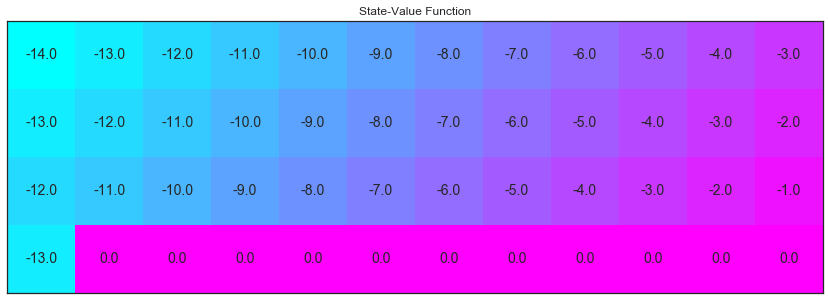

In [9]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0][0:13] = -np.arange(3, 15)[::-1]
V_opt[1][0:13] = -np.arange(3, 15)[::-1] + 1
V_opt[2][0:13] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

Above state value function is the optimal state value function. Every episode starts with state 36(bottom-left corner) and it will take an agent 13 steps from there to reach state 47(bottome- right corner). This is the shortest route. Each step gives a reward of -1. Hence for state 36 the cumulative value of shortest path is -13. Same can be verified for other states for the shortest path.

## Sarsa(0)

In [132]:
def epsilon_greedy(eps, Q, state):
    """ Select action based on epsilon-greedy policy"""
    
    if random.random() > eps: ## random.random() generates a random number between 0 and 1, excluding 1,i.e.[0,1)
        action = np.argmax(Q[state])
    else:
        #action = random.choice(np.arange(env.action_space.n)) # doesn't mater which we choose
        action = env.action_space.sample() # both ways of choosing random action for eps-greed gives same score
        #random.seed(0)
        #action = random.choice(np.arange(env.action_space.n))
    return action

In [135]:
def update_sarsa0(Q, state, action, reward, alpha,gamma, next_state = None, next_action = None):
    
    current = Q[state][action] # current states value.. accumulatd reward for reaching this state 
    Q_s = Q[next_state][next_action] if next_state is not None else 0
    
    target = reward + (gamma * Q_s)
    Q[state][action] = current + alpha*( target - current)
    return Q[state][action]


    

In [179]:
def sarsa0(env,num_episodes, alpha, gamma = 1.0,  plot_episode = 100 ):
    
    Q = defaultdict(lambda : np.zeros(env.action_space.n)) # creates a dictionary with number of values per key as 
                                                            # number of actions per state. key = state
        
    
    
    temp_score = deque(maxlen = plot_episode ) # append scores of every plot_episode number of episodes.e.g list scores of 100 episodes
    avg_score = deque( maxlen = num_episodes) # average of plot_episodes number of episodes e.g avg of 100 episodes
    
    
    for i_ep in range(1,num_episodes + 1):
        
        if i_ep % 1000 == 0:
            print('\rProgress {}/{}'.format(i_ep,num_episodes), end="")
            sys.stdout.flush()
    
        state = env.reset() # select first random state
        #action = epsilon_greedy(eps , Q, state)
        score = 0 # set score for this episode to 0
        
        eps = 1/i_ep # using larger epsilon for initial episode to promote 
                     # exploration and smaller later for explotation
        
        action = epsilon_greedy(eps , Q, state)

        while True:  
            #action = epsilon_greedy(eps , Q, state)
            next_state, reward, done, info  = env.step(action) # create next state
            #next_action = epsilon_greedy(eps , Q, next_state)          
            score += reward
            #Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma, 
                                             #next_state , next_action )
            #state = next_state
            
            #if the next_state wasn't the last state.update Qstate-action and moe on to next state
            #to repeat the same procedure for them
            if not done:
                next_action = epsilon_greedy(eps, Q , next_state ) # select later action for next_state
                Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma, 
                                                 next_state , next_action )
                
                
                state = next_state # make inital state a next_state and initial action as next action to start over
                action = next_action
                
                # append scores for this episode until its done
                temp_score.append(score)
            #if done:
                #temp_score.append(score)
                #break
            if done:
                
                # if the next_state created was lst state, update the Q state action and break the episode
                Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma)
                                                 
                break
            # take avg of scores every plot_episode number of episodes
            
        if (i_ep % plot_episode == 0):
            avg_score.append(np.mean(temp_score)) # append  every plot_episodes number of episodes
            
            
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_score),endpoint=False), np.asarray(avg_score))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_episode)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_episode), np.max(avg_score))    
    return Q     
            
        
    
    
    
    

In [182]:
def sarsa01(env,num_episodes, alpha, gamma = 1.0,  plot_episode = 100 ):
    
    Q = defaultdict(lambda : np.zeros(env.action_space.n)) # creates a dictionary with number of values per key as 
                                                            # number of actions per state. key = state
        
    
    
    temp_score = deque(maxlen = plot_episode ) # append scores of every plot_episode number of episodes.e.g list scores of 100 episodes
    avg_score = deque( maxlen = num_episodes) # average of plot_episodes number of episodes e.g avg of 100 episodes
    
    
    for i_ep in range(1,num_episodes + 1):
        
        if i_ep % 1000 == 0:
            print('\rProgress {}/{}'.format(i_ep,num_episodes),end="")
            sys.stdout.flush()
    
        state = env.reset() # select first random state
        #action = epsilon_greedy(eps , Q, state)
        score = 0 # set score for this episode to 0
        
        eps = 1/i_ep # using larger epsilon for initial episode to promote 
                     # exploration and smaller later for explotation
        
        #action = epsilon_greedy(eps , Q, state)

        while True:  
            action = epsilon_greedy(eps , Q, state)
            next_state, reward, done, info  = env.step(action) # create next state
            next_action = epsilon_greedy(eps , Q, next_state)          
            score += reward
            Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma, 
                                             next_state , next_action )
            state = next_state
            
            # if the next_state wasn't the last state.update Qstate-action and moe on to next state
            # to repeat the same procedure for them
            ##if not done:
                ##next_action = epsilon_greedy(eps, Q , next_state ) # select later action for next_state
                ##Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma, 
                                             ##next_state , next_action )
                
                
                ##state = next_state # make inital state a next_state and initial action as next action to start over
                ##action = next_action
                
                # append scores for this episode until its done
                ##temp_score.append(score)
            if done:
                temp_score.append(score)
                break
            ##if done:
                
                # if the next_state created was lst state, update the Q state action and break the episode
                #3Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma)
                                                 
                ##break
            # take avg of scores every plot_episode number of episodes
            
        if (i_ep % plot_episode == 0):
            avg_score.append(np.mean(temp_score)) # append  every plot_episodes number of episodes
            
            
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_score),endpoint=False), np.asarray(avg_score))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_episode)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_episode), np.max(avg_score))    
    return Q     
            
        
    
    
    
    

Progress 500000/500000

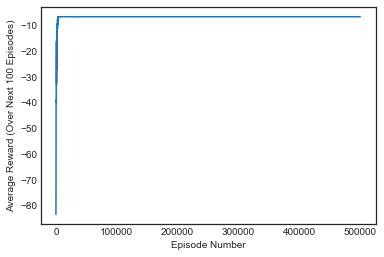

Best Average Reward over 100 Episodes:  -6.66


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  1  1  1  1  2  2  1  2  2]
 [ 1  0  1  1  1  1  1  3  2  1  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


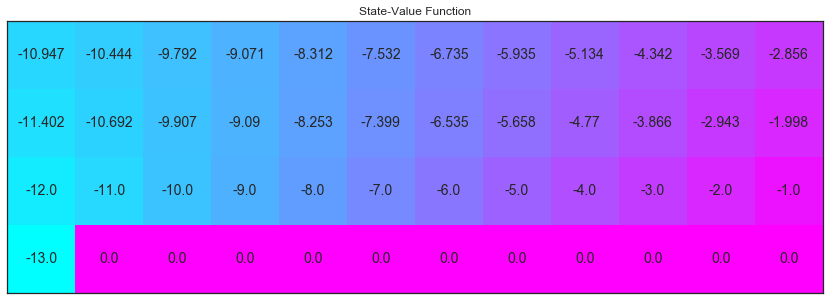

In [184]:
Q_sarsa = sarsa0(env, 500000, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

In [195]:
np.arange(48).reshape(4,12)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [209]:
#print(Q_sarsa)
import pandas as pd
df_Q = pd.DataFrame.from_dict(data = Q_sarsa)
df_Q

,36,24,25,12,13,14,15,16,17,5,...,32,31,33,34,22,23,11,35,19,10
0,-13.000000,-12.153239,-11.047354,-11.405408,-10.692105,-9.913928,-9.089986,-8.258730,-7.408163,-7.542612,...,-4.069653,-5.030503,-3.038072,-2.017685,-2.956641,-2.005053,-2.868406,-1.017035,-5.660930,-3.575951
1,-47.423498,-12.000000,-11.000000,-11.401987,-10.692967,-9.906916,-9.089864,-8.253117,-7.399448,-7.531942,...,-4.000000,-5.000000,-3.000000,-2.000000,-2.943883,-2.002193,-2.870111,-1.015502,-5.658019,-3.570829
2,-13.084100,-12.182074,-27.000006,-11.413275,-10.700527,-9.907737,-9.097514,-8.254084,-7.404880,-7.535261,...,-4.995472,-9.917360,-7.999096,-4.633952,-2.943457,-1.997944,-2.856004,-1.000000,-5.661259,-3.568871
3,-13.098103,-12.163105,-11.064754,-11.404641,-10.702262,-9.916581,-9.096800,-8.254661,-7.417018,-7.538157,...,-4.074478,-5.024829,-3.054841,-2.058098,-2.955130,-2.009686,-2.870073,-1.049986,-5.657844,-3.578398


Progress 100000/100000

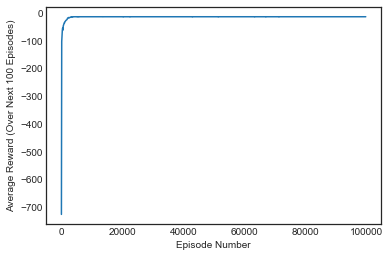

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 3  2  0  1  1  1  2  3  2  3  1  2]
 [ 1  1  1  3  0  1  1  1  2  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


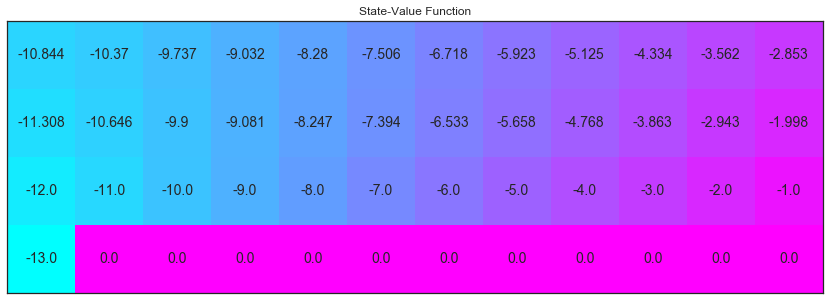

In [183]:
Q_sarsa = sarsa01(env, 100000, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

## SarsaMax

In [138]:
def sarsamax(Q, state, action, reward, alpha, gamma, next_state = None):
    
    current = Q[state][action]
    Q_smax = np.max(Q[next_state]) if next_state is not None else 0
    target = reward + gamma*Q_smax
    new_value = current + alpha*(target - current)
    return new_value
    
    

In [167]:
def update_sarsamax( env,num_episodes, alpha, gamma = 1.0,  plot_episode = 100 ):
    
    Q = defaultdict(lambda : np.zeros(env.action_space.n)) # creates a dictionary with number of values per key as 
                                                            # number of actions per state. key = state
        
    
    
    temp_score = deque(maxlen = plot_episode ) # append scores of every plot_episode number of episodes.e.g list scores of 100 episodes
    avg_score = deque( maxlen = num_episodes) # average of plot_episodes number of episodes e.g avg of 100 episodes
    
    
    for i_ep in range(1,num_episodes + 1):
        
        if i_ep % 1000 == 0:
            print('\rProgress {}/{}'.format(i_ep,num_episodes), end = "")
            sys.stdout.flush()
    
        state = env.reset() # select first random state
        #action = epsilon_greedy(eps , Q, state)
        score = 0 # set score for this episode to 0
        
        eps = 1/i_ep # using larger epsilon for initial episode to promote 
                     # exploration and smaller later for explotation
        
        #action = epsilon_greedy(eps , Q, state)

        while True:  
            action = epsilon_greedy(eps , Q, state)
            next_state, reward, done, info  = env.step(action) # create next state
            #next_action = epsilon_greedy(eps , Q, next_state)          
            score += reward
            Q[state][action] = sarsamax(Q, state, action, reward, alpha, gamma, 
                                             next_state  )
            state = next_state
            
            # if the next_state wasn't the last state.update Qstate-action and moe on to next state
            # to repeat the same procedure for them
            ##if not done:
                ##next_action = epsilon_greedy(eps, Q , next_state ) # select later action for next_state
                ##Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma, 
                                             ##next_state , next_action )
                
                
                ##state = next_state # make inital state a next_state and initial action as next action to start over
                ##action = next_action
                
                # append scores for this episode until its done
                ##temp_score.append(score)
            if done:
                temp_score.append(score)
                break
            ##if done:
                
                # if the next_state created was lst state, update the Q state action and break the episode
                #3Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma)
                                                 
                ##break
            # take avg of scores every plot_episode number of episodes
            
        if (i_ep % plot_episode == 0):
            avg_score.append(np.mean(temp_score)) # append  every plot_episodes number of episodes
            
            
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_score),endpoint=False), np.asarray(avg_score))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_episode)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_episode), np.max(avg_score))    
    return Q     
            
        

Progress 100000/100000

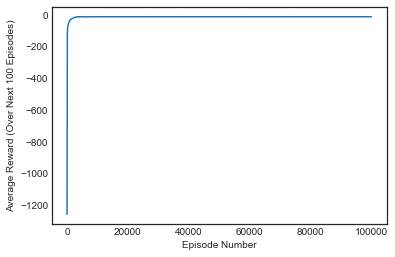

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 0  2  1  1  0  1  1  0  1  2  2  1]
 [ 1  1  2  1  0  1  1  1  2  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


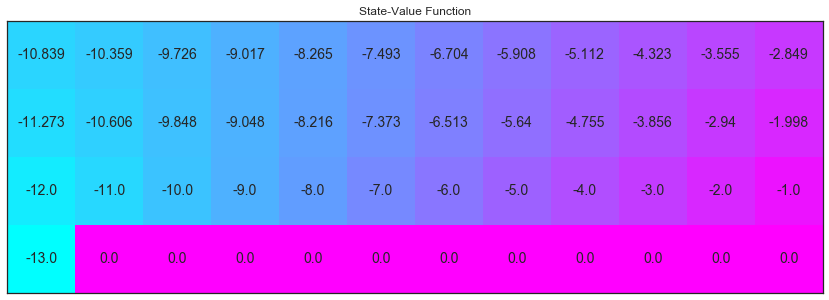

In [168]:
Q_sarsamax = update_sarsamax( env,num_episodes = 100000, alpha = 0.01, gamma = 1.0,  plot_episode = 100 )

policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

## Expected Sarsa

In [123]:
def expected_sarsa(env,Q, state, action, reward,eps, gamma, alpha, next_state = None):
    nA = env.action_space.n
    current = Q[state][action]
    policy_s = np.ones(nA) * eps / nA
    policy_s[np.argmax(Q[next_state])] = 1 - (eps - (eps/nA))
    Q_s_exp = np.dot(Q[next_state], policy_s) #if next_state is not None else 0
    target = reward + gamma*Q_s_exp
    new_value = current + alpha*(target - current)
    return new_value

In [166]:
def update_exp_sarsa( env,num_episodes, alpha, gamma = 1.0,  plot_episode = 100, eps = 0.005):
    
    Q = defaultdict(lambda : np.zeros(env.action_space.n)) # creates a dictionary with number of values per key as 
                                                            # number of actions per state. key = state
        
    
    
    temp_score = deque(maxlen = plot_episode ) # append scores of every plot_episode number of episodes.e.g list scores of 100 episodes
    avg_score = deque( maxlen = num_episodes) # average of plot_episodes number of episodes e.g avg of 100 episodes
    
    
    for i_ep in range(1,num_episodes + 1):
        
        if i_ep % 1000 == 0:
            print('\rProgress {}/{}'.format(i_ep,num_episodes), end="")
            sys.stdout.flush()
    
        state = env.reset() # select first random state
        #action = epsilon_greedy(eps , Q, state)
        score = 0 # set score for this episode to 0
        
        #eps = 1/i_ep # using larger epsilon for initial episode to promote 
                     # exploration and smaller later for explotation
        
        #action = epsilon_greedy(eps , Q, state)

        while True:  
            action = epsilon_greedy(eps , Q, state)
            next_state, reward, done, info  = env.step(action) # create next state
            #next_action = epsilon_greedy(eps , Q, next_state)          
            score += reward
            Q[state][action] = expected_sarsa(env,Q, state, action, reward, eps, gamma, alpha,next_state )
                                               
            state = next_state
            
            # if the next_state wasn't the last state.update Qstate-action and moe on to next state
            # to repeat the same procedure for them
            ##if not done:
                ##next_action = epsilon_greedy(eps, Q , next_state ) # select later action for next_state
                ##Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma, 
                                             ##next_state , next_action )
                
                
                ##state = next_state # make inital state a next_state and initial action as next action to start over
                ##action = next_action
                
                # append scores for this episode until its done
                ##temp_score.append(score)
            if done:
                temp_score.append(score)
                break
            ##if done:
                
                # if the next_state created was lst state, update the Q state action and break the episode
                #3Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma)
                                                 
                ##break
            # take avg of scores every plot_episode number of episodes
            
        if (i_ep % plot_episode == 0):
            avg_score.append(np.mean(temp_score)) # append  every plot_episodes number of episodes
            
            
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_score),endpoint=False), np.asarray(avg_score))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_episode)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_episode), np.max(avg_score))    
    return Q     
            
    
    
    
    

Progress 100000/100000

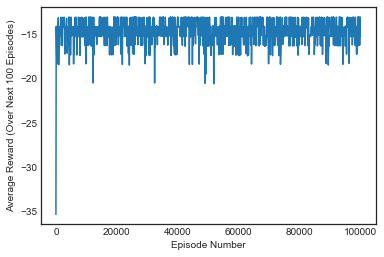

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 0  1  1  1  0  1  1  2  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


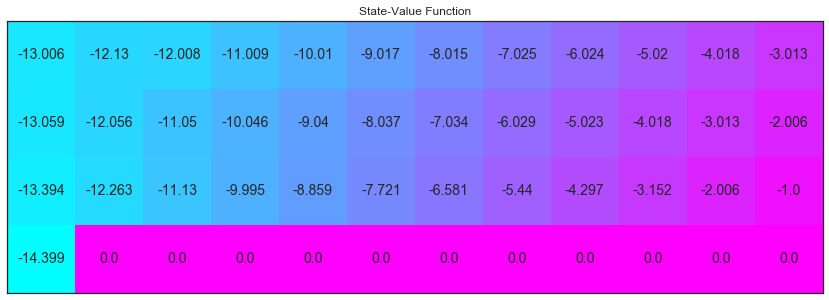

In [165]:
Q_expsarsa = update_exp_sarsa(env, 100000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])

Progress 500000/500000

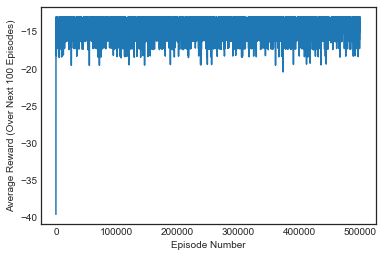

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 3  1  0  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


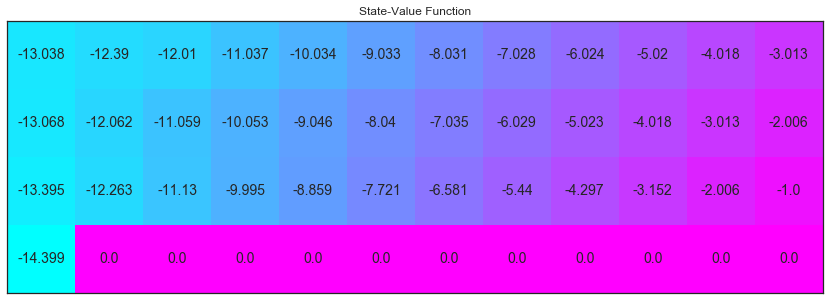

In [185]:
Q_expsarsa = update_exp_sarsa(env, 500000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])

Lets modify update_exp_sarsa to be exploratory at first then exploitative by setting epsilon as 1/i_ep

In [153]:
def new_update_exp_sarsa( env,num_episodes, alpha, gamma = 1.0,  plot_episode = 100):
    
    Q = defaultdict(lambda : np.zeros(env.action_space.n)) # creates a dictionary with number of values per key as 
                                                            # number of actions per state. key = state
        
    
    
    temp_score = deque(maxlen = plot_episode ) # append scores of every plot_episode number of episodes.e.g list scores of 100 episodes
    avg_score = deque( maxlen = num_episodes) # average of plot_episodes number of episodes e.g avg of 100 episodes
    
    
    for i_ep in range(1,num_episodes + 1):
        
        if i_ep % 1000 == 0:
            print('\rProgress {}/{}'.format(i_ep,num_episodes), end = "")
            sys.stdout.flush()
    
        state = env.reset() # select first random state
        #action = epsilon_greedy(eps , Q, state)
        score = 0 # set score for this episode to 0
        
        eps = 1/i_ep # using larger epsilon for initial episode to promote 
                     # exploration and smaller later for explotation
        
        #action = epsilon_greedy(eps , Q, state)

        while True:  
            action = epsilon_greedy(eps , Q, state)
            next_state, reward, done, info  = env.step(action) # create next state
            #next_action = epsilon_greedy(eps , Q, next_state)          
            score += reward
            Q[state][action] = expected_sarsa(env,Q, state, action, reward, eps, gamma, alpha,next_state )
                                               
            state = next_state
            
            # if the next_state wasn't the last state.update Qstate-action and moe on to next state
            # to repeat the same procedure for them
            ##if not done:
                ##next_action = epsilon_greedy(eps, Q , next_state ) # select later action for next_state
                ##Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma, 
                                             ##next_state , next_action )
                
                
                ##state = next_state # make inital state a next_state and initial action as next action to start over
                ##action = next_action
                
                # append scores for this episode until its done
                ##temp_score.append(score)
            if done:
                temp_score.append(score)
                break
            ##if done:
                
                # if the next_state created was lst state, update the Q state action and break the episode
                #3Q[state][action] = update_sarsa0(Q, state, action, reward, alpha, gamma)
                                                 
                ##break
            # take avg of scores every plot_episode number of episodes
            
        if (i_ep % plot_episode == 0):
            avg_score.append(np.mean(temp_score)) # append  every plot_episodes number of episodes
            
            
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_score),endpoint=False), np.asarray(avg_score))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_episode)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_episode), np.max(avg_score))    
    return Q     
            
    
    

Progress 100000/100000

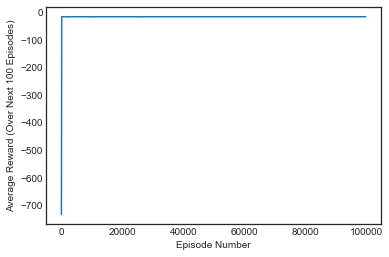

Best Average Reward over 100 Episodes:  -17.0


**<span style="color: red;">PLEASE TRY AGAIN</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0  0  0  0  0  0  1  0  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


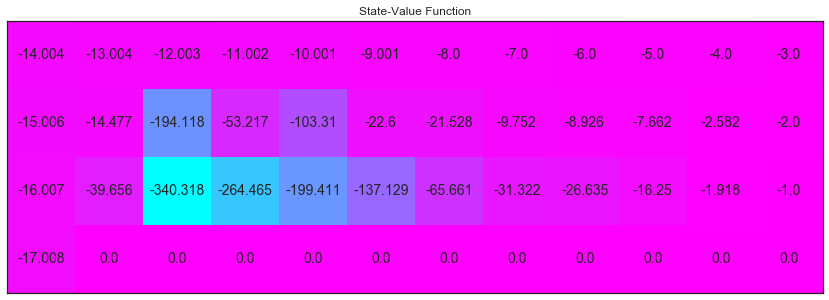

In [159]:
Q_expsarsa = new_update_exp_sarsa(env, 100000, 0.4)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])